[  0. 226. 137. 125.]
[125. 137. 226.   0.]


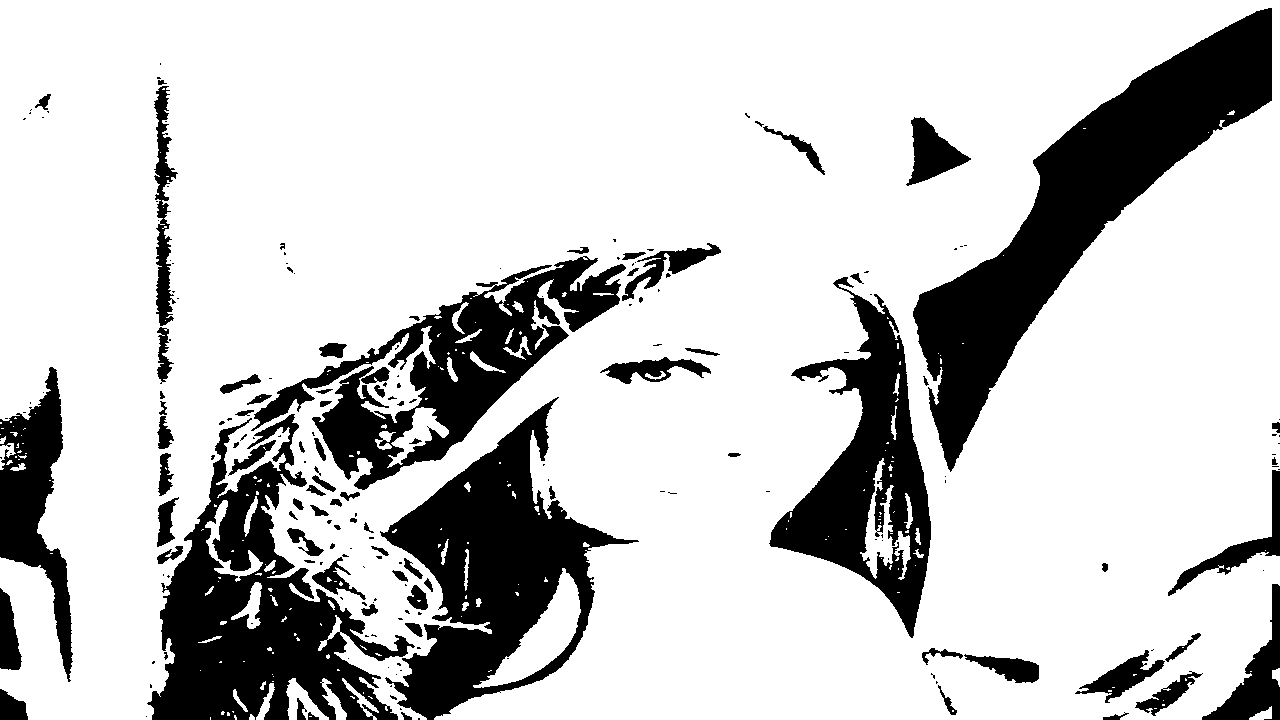

In [180]:

from pynq import Overlay
from pynq.lib.iic import *
import cffi
import pynq.lib.dma
import time
from pynq import allocate
import numpy as np
from PIL import Image



_ffi = cffi.FFI()
overlay = Overlay("./bit/kv260_3d_svm.bit", dtbo="./dev.dtbo", ignore_version=True)
sobel = overlay.sobel_0
sobel.write(0x00, 0x81)

dma_send = overlay.axi_dma_0
dma_recv = overlay.axi_dma_1


# img = np.zeros((512,512,4))
# print(img.shape)
# t = np.array(Image.open('./lena.png'))
# print(t.shape)
# img[0] = t[0]
# img[1] = t[1]
# img[2] = t[2]
# print(img.shape)
img = np.array(Image.open("lena2.png"))
img = np.concatenate((np.zeros((720,1280, 1)), img), axis=2)
print(img[0][0])
copy = np.copy(img)
img[:,:,0] = copy[:,:,3]
img[:,:,1] = copy[:,:,2]
img[:,:,2] = copy[:,:,1]
img[:,:,3] = copy[:,:,0]

print(img[0][0])
input_buffer = allocate(shape=(720,1280,4), dtype=np.uint8)
input_buffer[:]=img
dma_send.sendchannel.transfer(input_buffer)

output_buffer = allocate(shape=(720,1280,4), dtype=np.uint8)
dma_recv.recvchannel.transfer(output_buffer)

output_buffer = output_buffer[:,:,:3]
Image.fromarray(output_buffer)


